In [1]:
from keys import FTX_API_KEY, FTX_API_SECRET
from scipy.stats import skew, kurtosis
import seaborn as sns
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from utility_classes.correlation import Correlation, CSVManager
from utility_classes.historical_data_processor import FTXDataProcessor
import seaborn as sns 
import dateutil.parser as dp
corr = Correlation(perp_folder_path='/home/harry/trading_algo/crypto_trading_researches/strategy_backtests/historical_data/all_perps', spot_folder_path='/home/harry/trading_algo/crypto_trading_researches/strategy_backtests/historical_data/all_spots')

### rank volatility

[('TOMO', 0.8045280063535821),
 ('BTMX', 0.5487302761383019),
 ('REN', 0.5307400823928637),
 ('MATIC', 0.5140884298649057),
 ('OKB', 0.5061089605872736),
 ('KNC', 0.5028975187550944),
 ('RUNE', 0.48980728882007685),
 ('RSR', 0.4579484632713595),
 ('BAND', 0.4158621884717277),
 ('OMG', 0.41465549361488463),
 ('BNT', 0.4134328518912446),
 ('ALPHA', 0.39680993664661085),
 ('LEO', 0.3920658831221434),
 ('GRT', 0.39019134973882114),
 ('1INCH', 0.3881669314051459),
 ('TRYB', 0.386686960181623),
 ('SXP', 0.3645645371348982),
 ('HT', 0.3319430757728295),
 ('UNI', 0.3298285514813573),
 ('PAXG', 0.32954015439536627),
 ('TRX', 0.32489498508135833),
 ('MKR', 0.31736486828567506),
 ('XRP', 0.3039889574883377),
 ('SNX', 0.29042417597317777),
 ('SUSHI', 0.2812573771202408),
 ('AAVE', 0.27269374868952234),
 ('DOGE', 0.26796038746485223),
 ('XAUT', 0.267772137725559),
 ('BCH', 0.23155402539538625),
 ('LINK', 0.21306942475680365),
 ('BNB', 0.2032743636798596),
 ('LTC', 0.19885168743494658),
 ('BRZ', 0.1

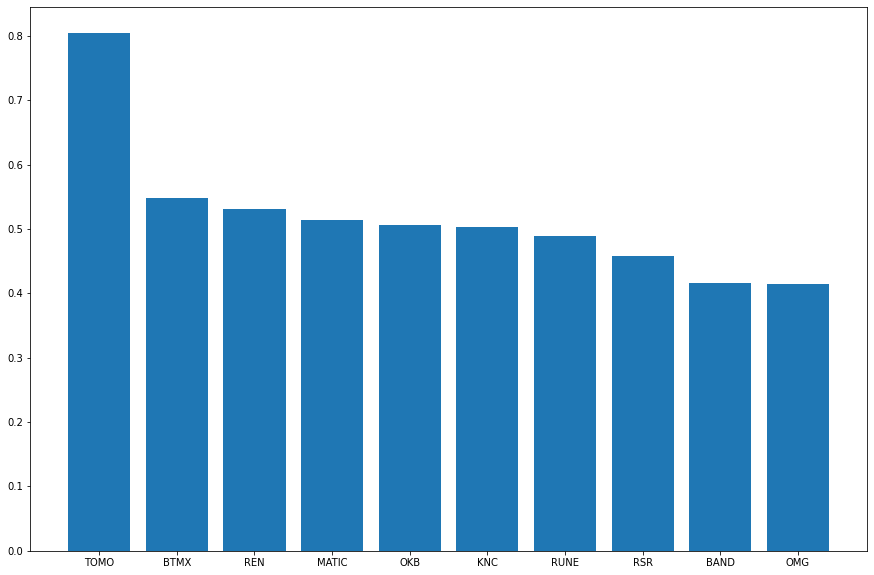

In [2]:

df = pd.read_csv('/home/harry/trading_algo/crypto_trading_researches/strategy_backtests/historical_data/token_borrow_rate.csv')
token_list = df['coin'].to_list()
corr.rank_vol('H', lookback_period = 720, filter_list = token_list)

[('DMG', 1.0329637312284283),
 ('DENT', 0.8423726965516429),
 ('ALCX', 0.8257943856543417),
 ('HNT', 0.8242794455554914),
 ('STMX', 0.8158369693890493),
 ('ORBS', 0.807322855823731),
 ('NPXS', 0.8019095209013635),
 ('TOMO', 0.8017443125852369),
 ('MTL', 0.7216434657113483),
 ('AMPL', 0.7004463581151209),
 ('MTA', 0.6754710541601869),
 ('DODO', 0.6581466874788602),
 ('REEF', 0.6223287481114264),
 ('SAND', 0.618434451225888),
 ('CHZ', 0.6099092242279462),
 ('KIN', 0.5824626118274322),
 ('CONV', 0.5816768993344055),
 ('BAL', 0.5591820479443014),
 ('BTMX', 0.5535481966417557),
 ('ZRX', 0.551009259540098),
 ('BAT', 0.5402826908788596),
 ('ENJ', 0.5272533180660498),
 ('REN', 0.5218166973415262),
 ('CRV', 0.5175307576714767),
 ('ROOK', 0.5163093174096443),
 ('MATIC', 0.514651980938277),
 ('CREAM', 0.5069866720650801),
 ('KNC', 0.5031241347332498),
 ('FTM', 0.4909712763340449),
 ('PERP', 0.4874639494621791),
 ('TRU', 0.487272726015879),
 ('RUNE', 0.48125309636746466),
 ('YFII', 0.4772680213825

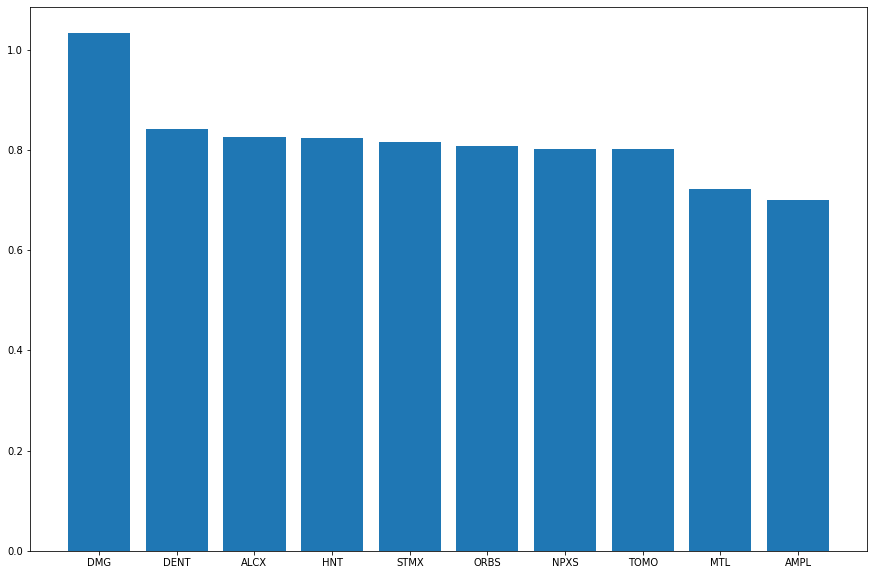

In [3]:
corr.rank_vol('H', lookback_period = 720)

### write a method to find the balance between volatility and kurtosis; for the purpose of this strategy, I want high variance low kurtosis token to trade

In [24]:
rank_list=[('TOMO', 0.8045280063535821),
 ('BTMX', 0.5487302761383019),
 ('REN', 0.5307400823928637),
 ('MATIC', 0.5140884298649057),
 ('OKB', 0.5061089605872736),
 ('KNC', 0.5028975187550944),
 ('RUNE', 0.48980728882007685),
 ('RSR', 0.4579484632713595),
 ('BAND', 0.4158621884717277),
 ('OMG', 0.41465549361488463),
 ('BNT', 0.4134328518912446),
 ('ALPHA', 0.39680993664661085),
 ('LEO', 0.3920658831221434),
 ('GRT', 0.39019134973882114),
 ('1INCH', 0.3881669314051459),
 ('TRYB', 0.386686960181623),
 ('SXP', 0.3645645371348982),
 ('HT', 0.3319430757728295),
 ('UNI', 0.3298285514813573),
 ('PAXG', 0.32954015439536627),
 ('TRX', 0.32489498508135833),
 ('MKR', 0.31736486828567506),
 ('XRP', 0.3039889574883377),
 ('SNX', 0.29042417597317777),
 ('SUSHI', 0.2812573771202408),
 ('AAVE', 0.27269374868952234),
 ('DOGE', 0.26796038746485223),
 ('XAUT', 0.267772137725559),
 ('BCH', 0.23155402539538625),
 ('LINK', 0.21306942475680365),
 ('BNB', 0.2032743636798596),
 ('LTC', 0.19885168743494658),
 ('BRZ', 0.17335367568067445),
 ('CUSDT', 0.146635060599718),
 ('ETH', 0.13808580277297286),
 ('BTC', 0.10539553346216249),
 ('USDT', 0.022069803465191447)]
token_list=[]
for t in rank_list:
    token_list.append(t[0])
token_list

['TOMO',
 'BTMX',
 'REN',
 'MATIC',
 'OKB',
 'KNC',
 'RUNE',
 'RSR',
 'BAND',
 'OMG',
 'BNT',
 'ALPHA',
 'LEO',
 'GRT',
 '1INCH',
 'TRYB',
 'SXP',
 'HT',
 'UNI',
 'PAXG',
 'TRX',
 'MKR',
 'XRP',
 'SNX',
 'SUSHI',
 'AAVE',
 'DOGE',
 'XAUT',
 'BCH',
 'LINK',
 'BNB',
 'LTC',
 'BRZ',
 'CUSDT',
 'ETH',
 'BTC',
 'USDT']

In [25]:
# get a ratio b/w std and kurtosis, then rank them from small to large. Smaller the better
def std_kurtosis(token, lookback, timeframe):
    df_spot = CSVManager(f'/home/harry/trading_algo/crypto_trading_researches/strategy_backtests/historical_data/all_spots/{token}_historical_data.csv').change_resolution(timeframe, 'SPOT')
    df_perp = CSVManager(f'/home/harry/trading_algo/crypto_trading_researches/strategy_backtests/historical_data/all_perps/{token}-PERP_historical_data.csv').change_resolution(timeframe, 'PERP')

    df_perp.rename(columns={'open': 'perp_open', 'high': 'perp_high', 'low': 'perp_low',
                                                    'close': 'perp_close', 'volume': 'perp_volume', 'vwap': 'perp_vwap'}, inplace=True)
    df_spot.rename(columns={'open': 'spot_open', 'high': 'spot_high', 'low': 'spot_low',
                                                    'close': 'spot_close', 'volume': 'spot_volume', 'vwap': 'spot_vwap'}, inplace=True)
                        
    joint_df = pd.merge(df_perp, df_spot, how='inner', on=['timestamp'])
    joint_df['spread'] = (joint_df['perp_vwap'] - joint_df['spot_vwap'])/joint_df['perp_vwap']*100

    joint_df=joint_df.dropna(subset=['spread'])

    joint_df.drop(columns=['perp_open', 'spot_open', 'perp_high', 'spot_high', 'perp_low', 'spot_low', 'perp_close', 'spot_close'], inplace=True)
    joint_df=joint_df.set_index('timestamp')


    
    std=np.std(joint_df['spread'].tail(lookback))
    # mean = np.mean(joint_df['spread'].tail(lookback))
    # skewness = skew(joint_df['spread'].tail(lookback))
    kurto = kurtosis(joint_df['spread'].tail(lookback), fisher=False)

    return kurto/std

In [26]:
rank = {}
for t in token_list:
    rank[t] = std_kurtosis(t, 192 ,'30T')

sort_orders = sorted(rank.items(), key=lambda x: x[1], reverse=False)
sort_orders

{'TOMO': 13.059710287996268,
 'BTMX': 130.0341922139818,
 'REN': 21.262864120961222,
 'MATIC': 48.54278861406642,
 'OKB': 22.912716749886222,
 'KNC': 45.23129866305441,
 'RUNE': 21.247753601686867,
 'RSR': 20.087352454411267,
 'BAND': 18.85183730609457,
 'OMG': 13.862367001523943,
 'BNT': 18.262318171109712,
 'ALPHA': 51.34082551134286,
 'LEO': 119.15255146810104,
 'GRT': 12.215486011300829,
 '1INCH': 46.28679055956908,
 'TRYB': 10.00251820708717,
 'SXP': 64.63212607791455,
 'HT': 23.82467541051356,
 'UNI': 34.811448894958055,
 'PAXG': 6.115960513799278,
 'TRX': 30.724484567801756,
 'MKR': 26.47760818607594,
 'XRP': 41.75121466237446,
 'SNX': 33.51916267045584,
 'SUSHI': 17.2810876145257,
 'AAVE': 23.722277569993988,
 'DOGE': 108.85528040961043,
 'XAUT': 12.528979416905912,
 'BCH': 37.0251857480237,
 'LINK': 45.236059504287944,
 'BNB': 19.838757699278776,
 'LTC': 38.03037547207999,
 'BRZ': 413.6893080795444,
 'CUSDT': 21.440394326946265,
 'ETH': 48.257513419424,
 'BTC': 69.295757586743

In [33]:
sort_orders = sorted(rank.items(), key=lambda x: x[1], reverse=False)
sort_orders

[('PAXG', 6.115960513799278),
 ('TRYB', 10.00251820708717),
 ('GRT', 12.215486011300829),
 ('XAUT', 12.528979416905912),
 ('TOMO', 13.059710287996268),
 ('OMG', 13.862367001523943),
 ('SUSHI', 17.2810876145257),
 ('BNT', 18.262318171109712),
 ('BAND', 18.85183730609457),
 ('BNB', 19.838757699278776),
 ('RSR', 20.087352454411267),
 ('RUNE', 21.247753601686867),
 ('REN', 21.262864120961222),
 ('CUSDT', 21.440394326946265),
 ('OKB', 22.912716749886222),
 ('AAVE', 23.722277569993988),
 ('HT', 23.82467541051356),
 ('MKR', 26.47760818607594),
 ('TRX', 30.724484567801756),
 ('SNX', 33.51916267045584),
 ('UNI', 34.811448894958055),
 ('BCH', 37.0251857480237),
 ('LTC', 38.03037547207999),
 ('XRP', 41.75121466237446),
 ('KNC', 45.23129866305441),
 ('LINK', 45.236059504287944),
 ('1INCH', 46.28679055956908),
 ('ETH', 48.257513419424),
 ('MATIC', 48.54278861406642),
 ('ALPHA', 51.34082551134286),
 ('SXP', 64.63212607791455),
 ('BTC', 69.29575758674348),
 ('DOGE', 108.85528040961043),
 ('LEO', 119.

mean: 0.2900845317557234; std: 0.1700488295157731; skew: 0.04569136371926242; kurtosis: 3.373557525809388


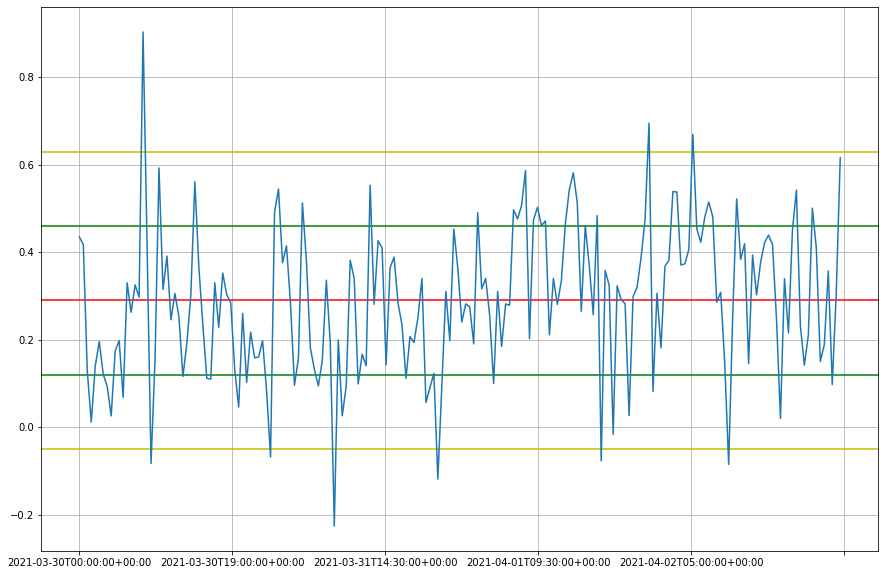

In [37]:
token = 'BNB'
timeframe = '30T'
lookback = 192

df_spot = CSVManager(f'/home/harry/trading_algo/crypto_trading_researches/strategy_backtests/historical_data/all_spots/{token}_historical_data.csv').change_resolution(timeframe, 'SPOT')
df_perp = CSVManager(f'/home/harry/trading_algo/crypto_trading_researches/strategy_backtests/historical_data/all_perps/{token}-PERP_historical_data.csv').change_resolution(timeframe, 'PERP')

df_perp.rename(columns={'open': 'perp_open', 'high': 'perp_high', 'low': 'perp_low',
                                                'close': 'perp_close', 'volume': 'perp_volume', 'vwap': 'perp_vwap'}, inplace=True)
df_spot.rename(columns={'open': 'spot_open', 'high': 'spot_high', 'low': 'spot_low',
                                                'close': 'spot_close', 'volume': 'spot_volume', 'vwap': 'spot_vwap'}, inplace=True)
                    
joint_df = pd.merge(df_perp, df_spot, how='inner', on=['timestamp'])
joint_df['spread'] = (joint_df['perp_vwap'] - joint_df['spot_vwap'])/joint_df['perp_vwap']*100

joint_df=joint_df.dropna(subset=['spread'])

joint_df.drop(columns=['perp_open', 'spot_open', 'perp_high', 'spot_high', 'perp_low', 'spot_low', 'perp_close', 'spot_close'], inplace=True)
joint_df=joint_df.set_index('timestamp')



fig, ax = plt.subplofig, ax = plt.subplots(figsize=(15,10))
spread=joint_df['spread'].tail(lookback)

std=np.std(joint_df['spread'].tail(lookback))
mean = np.mean(joint_df['spread'].tail(lookback))
skewness = skew(joint_df['spread'].tail(lookback))
kurto = kurtosis(joint_df['spread'].tail(lookback), fisher=False)



negative_std = mean-std
positive_std = mean+std


ax.set_xticks([0, (lookback/5), (lookback/5)*2, (lookback/5)*3, (lookback/5)*4, (lookback/5)*5])
ax.grid()
ax.axhline(y=negative_std, color='green', linestyle='-')
ax.axhline(y=positive_std, color='green', linestyle='-')
ax.axhline(y=mean, color='r', linestyle='-')
ax.axhline(y=mean+2*std, color='y', linestyle='-')
ax.axhline(y=mean-2*std, color='y', linestyle='-')


ax.plot(spread)
print(f'mean: {mean}; std: {std}; skew: {skewness}; kurtosis: {kurto}')

<AxesSubplot:xlabel='spread', ylabel='Count'>

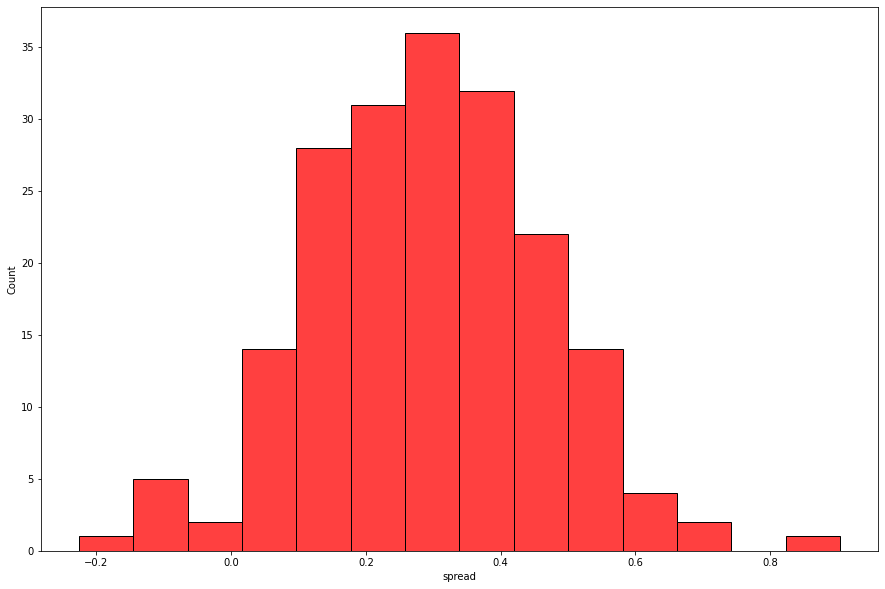

In [38]:
fig, ax = plt.subplots(figsize=(15,10))

sns.histplot(data=spread, color='r')

